### Please Insert your name in the below cell:

## Student Name:

# Assignment2 - Linear Regression

We will predict the price (`price` column) of an AirBNB listing using the features about the listing.

**Therefore, our unit of analysis is an AIRBNB LISTING**

# Setup (2.5 Points)

In [26]:
# Common imports (use seed value of 42)
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split






# Get the data (2.5 Points)

In [49]:
#We will predict the "price" value in the data set: (Import the dataset)
df = pd.read_csv("airbnb.csv")
print("Number of rows and columns in the dataset: ", df.shape)
# print(df.head())

Number of rows and columns in the dataset:  (10272, 23)


# Use Visualization and Statistics to gain some insight about your dataset (10 Points)

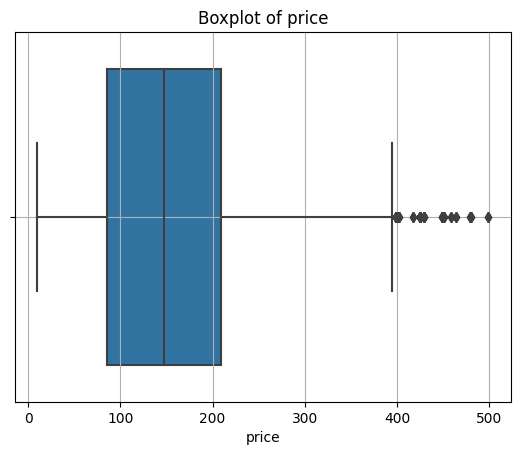

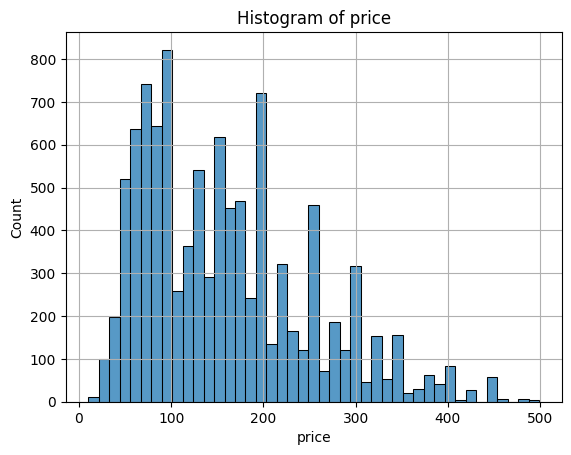

In [28]:
# Create a boxplot or histogram on the target variable and interpret your result in one paragraph

# boc plot with seaborn
ax = sns.boxplot(x=df["price"], data=df)
plt.title("Boxplot of price")
plt.xlabel("price")
plt.grid()
plt.show()

## Histogram on the target variable
ax2 = sns.histplot(x=df["price"],data=df)
plt.title("Histogram of price")
plt.xlabel("price")
plt.grid()
plt.show()

In [29]:
# print the statistics on the dataset
print(df.describe())

       host_is_superhost  host_identity_verified      latitude     longitude  \
count       10272.000000            10272.000000  10272.000000  10272.000000   
mean            0.109813                0.732769     42.339837    -71.085276   
std             0.312672                0.442536      0.024521      0.031732   
min             0.000000                0.000000     42.235942    -71.171789   
25%             0.000000                0.000000     42.329631    -71.105639   
50%             0.000000                1.000000     42.345171    -71.078910   
75%             0.000000                1.000000     42.354551    -71.062409   
max             1.000000                1.000000     42.389982    -71.000100   

       accommodates     bathrooms      bedrooms          beds  \
count  10272.000000  10236.000000  10242.000000  10248.000000   
mean       2.980432      1.193875      1.226128      1.568208   
std        1.703886      0.429381      0.719142      0.953916   
min        1.000000

# Split the data into train and test (70:30) (5 Points)

In [58]:
## test train split on the entire dataframe  (70% train, 30% test)
train, test = train_test_split(df, test_size=0.3, random_state=42)

In [57]:
train

,host_is_superhost,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,...,Number of amenities,guests_included,price_per_extra_person,minimum_nights,number_of_reviews,number_days_btw_first_last_review,review_scores_rating,cancellation_policy,price,price_gte_150
3437,0,1,Roslindale,42.287641,-71.129883,Apartment,Entire home/apt,5,1.0,2.0,...,19,5,30,2,12,68,97.0,moderate,150,1
6622,0,0,Allston,42.354976,-71.129493,Apartment,Private room,1,2.0,1.0,...,12,1,0,17,1,0,100.0,strict,45,0
2262,0,1,Fenway,42.343264,-71.090912,Apartment,Private room,1,1.0,1.0,...,14,1,30,2,5,310,100.0,flexible,100,0
2246,0,1,Fenway,42.340861,-71.088289,Apartment,Entire home/apt,3,1.0,0.0,...,14,1,0,3,32,474,95.0,strict,142,0
835,0,1,Roxbury,42.335659,-71.085204,Apartment,Entire home/apt,6,1.0,3.0,...,8,3,10,3,3,22,93.0,strict,229,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,0,1,Fenway,42.343944,-71.098309,Apartment,Entire home/apt,3,1.0,1.0,...,9,1,0,3,2,115,78.0,super_strict_30,249,1
5191,0,1,Beacon Hill,42.360802,-71.064504,Apartment,Private room,1,1.0,1.0,...,8,1,0,2,31,552,89.0,strict,100,0
5390,0,0,Downtown,42.359945,-71.062060,Apartment,Entire home/apt,2,1.0,1.0,...,12,1,0,5,4,238,100.0,moderate,275,1
860,0,1,Roxbury,42.316806,-71.073527,House,Private room,2,1.0,1.0,...,7,1,60,1,3,34,87.0,flexible,100,0


### Be careful: we haven't seperated the target column yet

## Check the missing values (5 Points)

In [31]:
## Check for missing values in dataframes
df_missing = pd.DataFrame(df.isna().sum())

print("Missing Values in Each Column")
df_missing


Missing Values in Each Column


,0
host_is_superhost,0
host_identity_verified,0
neighbourhood_cleansed,0
latitude,0
longitude,0
property_type,9
room_type,0
accommodates,0
bathrooms,36
bedrooms,30


# Data Prep (Import the functionalities and libraries that you need) (5 Points)

In [72]:
## import the libraries
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# Import scalar and processor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline


## Drop the variables we can't use in this tutorial (Our Target is the actual price not category)

In [59]:
# We can't use the following columns in this tutorial, because they are for classification task
# neighbourhood_group, room_type, last_review

## Drop the columns that are not needed
columnsToDrop = ["price_category","price_gte_150"]
train = train.drop(columnsToDrop, axis=1)
test = test.drop(columnsToDrop, axis=1)


## Separate the target variable (we don't want to transform it)

In [60]:
# Remove the Target variable from your dataset
y_train = train["price"]
X_train = train.drop("price", axis=1)

y_test = test["price"]
X_test = test.drop("price", axis=1)



##  Identify the numerical and categorical columns (You can do it manually but You HAVE to write the automated code that was explained in class too). You need to seperate the binary columns as well. (For binary columns you can do it manually). (15 Points)

In [62]:
# Identify the categorical columns
categoriacalColumns = X_train.select_dtypes(include=['object']).columns.to_list()
print("Categorical Columns: ", categoriacalColumns)

Categorical Columns:  ['neighbourhood_cleansed', 'property_type', 'room_type', 'bed_type', 'cancellation_policy']


In [54]:
# Identify the binary columns
binary_columns = ["host_is_superhost" ,"host_identity_verified"]
print("Binary Columns: ", binary_columns)

Binary Columns:  ['host_is_superhost', 'host_identity_verified']


In [63]:
# Be careful: numerical columns already includes the binary columns,
# So, we need to remove the binary columns from numerical columns.

otherCols = categoriacalColumns + binary_columns

# Identify the numerical columns by getting all columns and removing the categorical and binary columns
numericalColumns = [col for col in X_train.columns if col not in otherCols]
print("Numerical Columns: ", numericalColumns)

Numerical Columns:  ['latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'Number of amenities', 'guests_included', 'price_per_extra_person', 'minimum_nights', 'number_of_reviews', 'number_days_btw_first_last_review', 'review_scores_rating']


#### Check your data separately to make sure you have the right columns (Numeric, Categorical, and Binary)

In [40]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7190 entries, 3437 to 7270
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   host_is_superhost                  7190 non-null   int64  
 1   host_identity_verified             7190 non-null   int64  
 2   neighbourhood_cleansed             7190 non-null   object 
 3   latitude                           7190 non-null   float64
 4   longitude                          7190 non-null   float64
 5   property_type                      7182 non-null   object 
 6   room_type                          7190 non-null   object 
 7   accommodates                       7190 non-null   int64  
 8   bathrooms                          7171 non-null   float64
 9   bedrooms                           7171 non-null   float64
 10  beds                               7174 non-null   float64
 11  bed_type                           7190 non-null   ob

# Pipeline (20 Points)
### In this section you need to create and define the needed pipelines for each category of datatypes (Numeric, Categorical, and Binary).
#### You have deal with missing values and standardize the data where it is applicable.

In [73]:
#For Numeric values
## Create a pipeline for the numerical columns and deal with missing values


num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])



In [74]:
#For Categorical Values
## Create a pipeline for the categorical columns and deal with missing values

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="most_frequent")),
    ('one_hot', OneHotEncoder()),
])

In [75]:
#For Binary values
## Create a pipeline for the binary columns and deal with missing values

bin_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="most_frequent")),
    ('std_scaler', StandardScaler()),
])



### After defining your Pipeline you need to create the processor to actually transform your data

In [76]:
# Create the processor to process the data
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer([
    ("num", num_pipeline, numericalColumns),
    ("cat", cat_pipeline, categoriacalColumns),
    ("bin", bin_pipeline, binary_columns),
])


# Transform: fit_transform() for TRAIN (5 Points)
### Use the processor to fit_transform your train dataset here. check your result's shape

In [77]:
#Fit and transform the train data
X_train_prepared = preprocessor.fit_transform(X_train)
X_train_prepared

array([[-2.10940159, -1.39824237,  1.20477863, ...,  0.        ,
        -0.35058684,  0.60702649],
       [ 0.61906783, -1.38593382, -1.16133947, ...,  0.        ,
        -0.35058684, -1.64737457],
       [ 0.14448465, -0.16705969, -1.16133947, ...,  0.        ,
        -0.35058684,  0.60702649],
       ...,
       [ 0.82039585,  0.74441303, -0.56980994, ...,  0.        ,
        -0.35058684, -1.64737457],
       [-0.92762441,  0.3821493 , -0.56980994, ...,  0.        ,
        -0.35058684,  0.60702649],
       [-0.34071414, -0.53929512, -1.16133947, ...,  0.        ,
        -0.35058684, -1.64737457]])

# Tranform: transform() for TEST (5 Points)
### Use the processor to transform your test dataset here. check your result's shape

In [78]:
# Transform the test data
X_test_prepared = preprocessor.transform(X_test)
X_test_prepared

array([[ 0.63069768,  0.40533687,  1.79630816, ...,  1.        ,
        -0.35058684,  0.60702649],
       [ 0.15153485,  0.27611111, -0.56980994, ...,  0.        ,
        -0.35058684,  0.60702649],
       [-2.02789334, -0.91924215,  0.02171958, ...,  0.        ,
        -0.35058684,  0.60702649],
       ...,
       [ 0.15906806, -0.38872897,  1.20477863, ...,  1.        ,
        -0.35058684,  0.60702649],
       [ 0.11838687, -0.56878308, -0.56980994, ...,  0.        ,
        -0.35058684, -1.64737457],
       [-0.94171792,  0.19283558, -1.16133947, ...,  0.        ,
        -0.35058684,  0.60702649]])

# Train a Linear Regression model. (10 Points)
### Import Linear Regression from Scikit learn library and use it to first fit your model and the check your accuracy

In [80]:
# Import linear regression and fit your model using train dataset
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train_prepared, y_train)


LinearRegression()

#### Import mean_squared_error from Scikit learn and use it to evaluate your model once using train dataset and once using test dataset

In [81]:
# Import MSE
from sklearn.metrics import mean_squared_error

# Predict the price on the test dataset
y_pred = lin_reg.predict(X_test_prepared)

# Calculate the MSE
mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)

MSE:  2827.008484500635


In [82]:
#use Train dataset and calculate the RMSE and print out the result
y_pred_train = lin_reg.predict(X_train_prepared)

# Calculate the RMSE
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
print("RMSE on train dataset: ", rmse_train)



RMSE on train dataset:  52.063069050089716


In [83]:
#use Test dataset and calculate the RMSE and print out the result
y_pred_test = lin_reg.predict(X_test_prepared)

# Calculate the RMSE
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
print("RMSE on test dataset: ", rmse_test)


RMSE on test dataset:  53.169619939403695


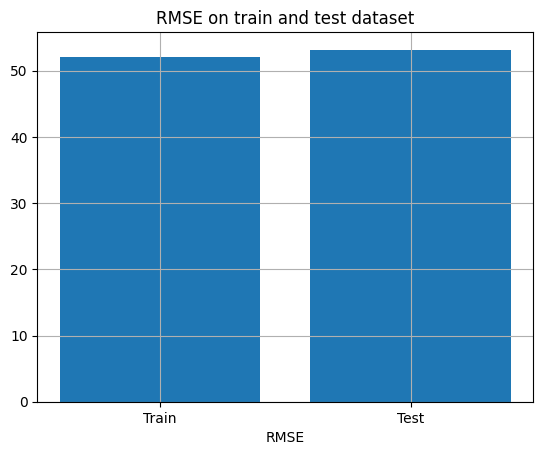

In [85]:
## plot RMSE on train and test dataset as bar chart

plt.bar(["Train","Test"],[rmse_train,rmse_test], label="Train")
plt.title("RMSE on train and test dataset")
plt.xlabel("RMSE")
plt.grid()
plt.show()


# Final Results and the evaluation (15 Points)

In [86]:
# What was the final result of RMSE for Train dataset

# print the RMSE on train dataset
print("RMSE on train dataset: ", rmse_train)

RMSE on train dataset:  52.063069050089716


In [87]:
# What was the final result of RMSE for Test dataset
# print the RMSE on test dataset
print("RMSE on test dataset: ", rmse_test)


RMSE on test dataset:  53.169619939403695


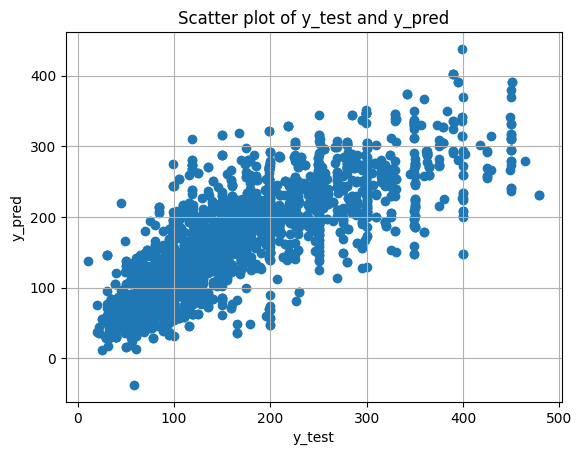

In [89]:
# Write 2 paragraph about your understanding of this model.
# Is the model overfitted or underfitted
# How accurate do you think your model is



## Reasoning for the problem 
---

## Question 1: Overfit or Underfit

we can deceide whether a regression model is overfit or underfit by using the following schemes

* Train and test error Difference
* Residual plots

### Train and test Error

Plot the loss curves for training and validation against one another. The model is overfitting if both curves are declining but the validation loss is much more than the training loss. On the other hand, the model is working well if both curves are falling but the validation loss is equal to or even lower than the training loss.

In our case, we ca use the RMSE errors, since both RMSE errors are same, we can cinsider that the model is neither overfit nor underfit.

### Residual plots

Compare the residuals to the projected values using a plot.Analyze the residuals for patterns or trends. If the residuals are evenly spaced out around zero, the fit is good. The residuals, on the other hand, suggest underfitting or overfitting if they exhibit a pattern or trend. A U-shaped or inverted U-shaped pattern in the residuals suggests that the model is underfitting. This indicates that the model is lacking crucial data and does not adequately account for the complexity of the data. The model is overfitting if the residuals exhibit a curve or wave-like structure. This indicates that the model is not capable of generalising to fresh data since it is fitting the training data too closely. If the residuals are uniformly distributed around zero and have a constant variance

In the residual plots plotted below, we could observe that there is no pattern, so we can consider this model to be a proper fit. 


## Accuracy of the model 
---

The model is certainly accurate to certiain extent with R2 score of 66%. We can improve the accuracy further by using 
* Using advanced imputations for missing values
* using feature selection to eliminate redundant variables
* using coorelation matrix to remove corelated variables






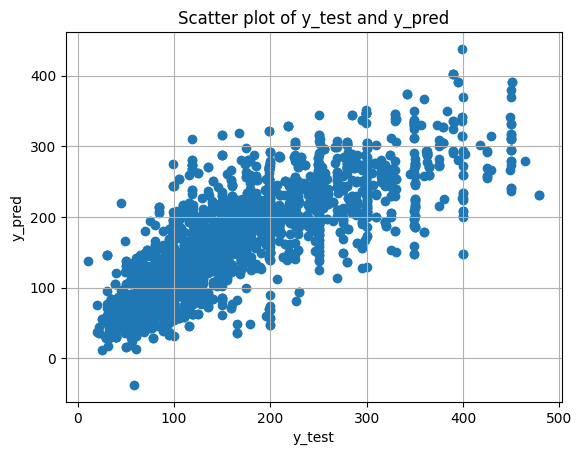

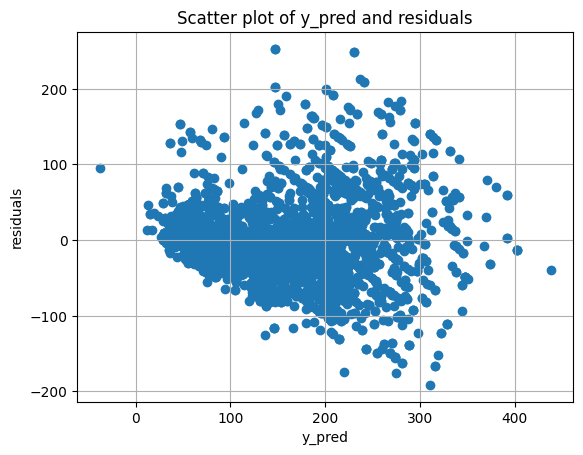

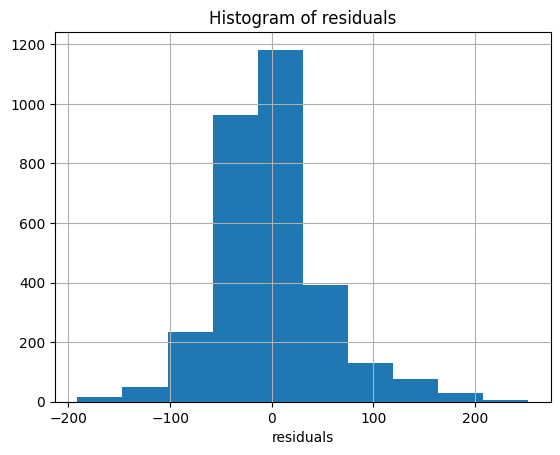

             price
count  3082.000000
mean     -0.080437
std      53.178187
min    -191.238281
25%     -30.289062
50%      -5.355469
75%      22.773438
max     252.777344
R2 score:  0.6629830843670125


In [93]:
# check if the regression model is overfitted or underfitted

plt.scatter(y_test, y_pred)
plt.title("Scatter plot of y_test and y_pred")
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.grid()
plt.show() 


# plot the residuals
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.title("Scatter plot of y_pred and residuals")
plt.xlabel("y_pred")
plt.ylabel("residuals")
plt.grid()
plt.show()

# plot the histogram of residuals
plt.hist(residuals)
plt.title("Histogram of residuals")
plt.xlabel("residuals")
plt.grid()
plt.show()

# print the statistics on the residuals
print(pd.DataFrame(residuals).describe())

## compute R2 score
r2_score(y_test, y_pred)
print("R2 score: ", r2_score(y_test, y_pred))